In [2]:
# data science imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage

# unsupervised algorithms
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from langdetect import detect

# metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
pd.get_option('display.max_columns')

20

In [4]:
# read in file
file = 'data/goodreads_sentiment.csv'

In [5]:
# read in file 
df = pd.read_csv(file)
df.head()

,url,bookTitle,bookImage,bookDesc,bookRating,ratingCount,reviewCount,Genre,pageCount,Author,lang,title_key_words,clean_keywords,sentiment_polarity,sentiment_subjectivity
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,https://i.gr-assets.com/images/S/compressed.ph...,"Could you survive on your own in the wild, wit...",4.32,6717635,176054,Young Adult,374,Suzanne Collins,en,"['hunger', 'games']",could survive wild every one make sure live se...,0.101623,0.484921
1,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,There is a door at the end of a silent corrido...,4.50,2668409,45724,Fantasy,870,J.K. Rowling,en,"['harry', 'potter', 'order', 'phoenix']",door end silent corridor haunting harry pottte...,-0.087273,0.420909
2,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,Classics,324,Harper Lee,en,"['kill', 'mockingbird']",unforgettable novel childhood sleepy southern ...,0.165686,0.368067
3,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,Classics,279,Jane Austen,en,"['pride', 'prejudice']",alternate cover edition isbn since immediate s...,0.475556,0.680000
4,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,About three things I was absolutely positive.F...,3.61,5231000,107619,Young Adult,501,Stephenie Meyer,en,['twilight'],three things absolutely positive first edward ...,0.240000,0.620000


In [6]:
print(df.Genre.nunique())

46


In [7]:
df.Genre.value_counts()


Fantasy                          1667
Fiction                          1637
Young Adult                       948
Romance                           595
Classics                          488
Historical-Historical Fiction     464
Nonfiction                        416
Science Fiction                   342
Mystery                           303
Horror                            206
Sequential Art-Graphic Novels     168
Religion                          157
Fantasy-Paranormal                107
Paranormal-Vampires               100
History                            94
Poetry                             88
Other                              87
Thriller                           86
Romance-Paranormal Romance         83
Philosophy                         82
Womens Fiction-Chick Lit           66
Childrens                          64
Short Stories                      52
Science                            43
Contemporary                       43
New Adult                          43
Plays       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8863 entries, 0 to 8862
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   url                     8863 non-null   object 
 1   bookTitle               8863 non-null   object 
 2   bookImage               8863 non-null   object 
 3   bookDesc                8863 non-null   object 
 4   bookRating              8863 non-null   float64
 5   ratingCount             8863 non-null   int64  
 6   reviewCount             8863 non-null   int64  
 7   Genre                   8863 non-null   object 
 8   pageCount               8863 non-null   int64  
 9   Author                  8863 non-null   object 
 10  lang                    8863 non-null   object 
 11  title_key_words         8863 non-null   object 
 12  clean_keywords          8863 non-null   object 
 13  sentiment_polarity      8863 non-null   float64
 14  sentiment_subjectivity  8863 non-null   

In [9]:
df.columns

Index(['url', 'bookTitle', 'bookImage', 'bookDesc', 'bookRating',
       'ratingCount', 'reviewCount', 'Genre', 'pageCount', 'Author', 'lang',
       'title_key_words', 'clean_keywords', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')

In [10]:
# get number unique book names
df.bookTitle.nunique()

8863

In [11]:
# drop duplicate books, including books with same title but different author
df_drop_dups = df.drop_duplicates(subset = 'bookTitle')

In [12]:
df_drop_dups.head()

,url,bookTitle,bookImage,bookDesc,bookRating,ratingCount,reviewCount,Genre,pageCount,Author,lang,title_key_words,clean_keywords,sentiment_polarity,sentiment_subjectivity
0,https://www.goodreads.com/book/show/2767052-th...,The Hunger Games,https://i.gr-assets.com/images/S/compressed.ph...,"Could you survive on your own in the wild, wit...",4.32,6717635,176054,Young Adult,374,Suzanne Collins,en,"['hunger', 'games']",could survive wild every one make sure live se...,0.101623,0.484921
1,https://www.goodreads.com/book/show/2.Harry_Po...,Harry Potter and the Order of the Phoenix,https://i.gr-assets.com/images/S/compressed.ph...,There is a door at the end of a silent corrido...,4.50,2668409,45724,Fantasy,870,J.K. Rowling,en,"['harry', 'potter', 'order', 'phoenix']",door end silent corridor haunting harry pottte...,-0.087273,0.420909
2,https://www.goodreads.com/book/show/2657.To_Ki...,To Kill a Mockingbird,https://i.gr-assets.com/images/S/compressed.ph...,The unforgettable novel of a childhood in a sl...,4.28,4772918,95595,Classics,324,Harper Lee,en,"['kill', 'mockingbird']",unforgettable novel childhood sleepy southern ...,0.165686,0.368067
3,https://www.goodreads.com/book/show/1885.Pride...,Pride and Prejudice,https://i.gr-assets.com/images/S/compressed.ph...,Alternate cover edition of ISBN 9780679783268S...,4.27,3206070,74020,Classics,279,Jane Austen,en,"['pride', 'prejudice']",alternate cover edition isbn since immediate s...,0.475556,0.680000
4,https://www.goodreads.com/book/show/41865.Twil...,Twilight,https://i.gr-assets.com/images/S/compressed.ph...,About three things I was absolutely positive.F...,3.61,5231000,107619,Young Adult,501,Stephenie Meyer,en,['twilight'],three things absolutely positive first edward ...,0.240000,0.620000


In [13]:
# drop unneeded columns
df_drop_dups.drop(['url', 'bookImage', 'bookDesc', 'pageCount', 'title_key_words', 'clean_keywords'], axis = 1, inplace = True)


In [14]:
df_drop_dups.head()

,bookTitle,bookRating,ratingCount,reviewCount,Genre,Author,lang,sentiment_polarity,sentiment_subjectivity
0,The Hunger Games,4.32,6717635,176054,Young Adult,Suzanne Collins,en,0.101623,0.484921
1,Harry Potter and the Order of the Phoenix,4.50,2668409,45724,Fantasy,J.K. Rowling,en,-0.087273,0.420909
2,To Kill a Mockingbird,4.28,4772918,95595,Classics,Harper Lee,en,0.165686,0.368067
3,Pride and Prejudice,4.27,3206070,74020,Classics,Jane Austen,en,0.475556,0.680000
4,Twilight,3.61,5231000,107619,Young Adult,Stephenie Meyer,en,0.240000,0.620000


In [15]:
df2 = df_drop_dups.copy()

keep_col = ['bookTitle', 'bookRating', 'Genre', 'Author', 'sentiment_polarity', 'sentiment_subjectivity']
df_keep = df2.loc[:, keep_col]

# for i in range(5):
#     df2.loc[ (df2['bookRating'] >= i) & (df2['bookRating'] <= i+1), 'rating_between'] = f"between {i} and {i+1}"
    
# #making a dummy col for each rating level
# ratings = df2['rating_between'].str.get_dummies(sep=",")
# ratings.head()

In [16]:
# one-hot-encode
cols = ['Genre', 'Author']
df_oh = df2.loc[:, cols]
df_oh = pd.get_dummies(df_oh)

df_oh.head()

,Genre_Adventure,Genre_Art,Genre_Autobiography-Memoir,Genre_Biography,Genre_Business,Genre_Childrens,Genre_Childrens-Picture Books,Genre_Classics,Genre_Contemporary,Genre_Culture,...,Author_Zoe Sugg,Author_Zoltan Andrejkovics,Author_Zora Neale Hurston,Author_Zoraida Córdova,Author_Zoë Heller,Author_kkat,Author_pleasefindthis,Author_Ágota Kristóf,Author_Åsne Seierstad,Author_Émile Zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# scale rating count
scaler = StandardScaler()

# Scale onlt the ASK_AMT column Prof Booth
cols = ['bookRating', 'ratingCount', 'reviewCount']
df_scaled = df2.loc[:, cols]

scaler.fit(df_scaled)
df_scale = pd.DataFrame(scaler.transform(df_scaled), columns= cols )
df_scale.head()


,bookRating,ratingCount,reviewCount
0,1.121215,25.467446,18.951885
1,1.847779,9.914930,4.581322
2,0.959757,17.998057,10.080243
3,0.919392,11.980011,7.701321
4,-1.744674,19.757487,11.406044


In [18]:
# PCA
pca = PCA()
pca_data = pca.fit_transform(df_scaled)
df2 = pd.DataFrame(pca_data)
df2

,0,1,2
0,6.632863e+06,18053.227350,-0.025565
1,2.581565e+06,32384.544249,-0.347081
2,4.686639e+06,42794.350987,-0.044726
3,3.119816e+06,19495.492630,-0.103707
4,5.144878e+06,43891.967971,0.642625
...,...,...,...
8858,-4.792532e+04,992.038141,-0.039039
8859,-6.829772e+04,1412.868776,-0.049579
8860,-8.065026e+04,1534.216810,-0.159972
8861,-6.659797e+04,-684.320692,0.329447


In [19]:
df_con = pd.concat([df_keep, df2, df_oh], axis=1)

df_con.head()

,bookTitle,bookRating,Genre,Author,sentiment_polarity,sentiment_subjectivity,0,1,2,Genre_Adventure,...,Author_Zoe Sugg,Author_Zoltan Andrejkovics,Author_Zora Neale Hurston,Author_Zoraida Córdova,Author_Zoë Heller,Author_kkat,Author_pleasefindthis,Author_Ágota Kristóf,Author_Åsne Seierstad,Author_Émile Zola
0,The Hunger Games,4.32,Young Adult,Suzanne Collins,0.101623,0.484921,6.632863e+06,18053.227350,-0.025565,0,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,4.50,Fantasy,J.K. Rowling,-0.087273,0.420909,2.581565e+06,32384.544249,-0.347081,0,...,0,0,0,0,0,0,0,0,0,0
2,To Kill a Mockingbird,4.28,Classics,Harper Lee,0.165686,0.368067,4.686639e+06,42794.350987,-0.044726,0,...,0,0,0,0,0,0,0,0,0,0
3,Pride and Prejudice,4.27,Classics,Jane Austen,0.475556,0.680000,3.119816e+06,19495.492630,-0.103707,0,...,0,0,0,0,0,0,0,0,0,0
4,Twilight,3.61,Young Adult,Stephenie Meyer,0.240000,0.620000,5.144878e+06,43891.967971,0.642625,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# # label encoding
# # creating instance of labelencoder
# labelencoder = LabelEncoder()
# df_con['title'] = labelencoder.fit_transform(df_con['bookTitle'])
df_con.drop(['bookTitle', 'Genre', 'Author'], axis = 1, inplace = True)

In [21]:
df_con

,bookRating,sentiment_polarity,sentiment_subjectivity,0,1,2,Genre_Adventure,Genre_Art,Genre_Autobiography-Memoir,Genre_Biography,...,Author_Zoe Sugg,Author_Zoltan Andrejkovics,Author_Zora Neale Hurston,Author_Zoraida Córdova,Author_Zoë Heller,Author_kkat,Author_pleasefindthis,Author_Ágota Kristóf,Author_Åsne Seierstad,Author_Émile Zola
0,4.32,0.101623,0.484921,6.632863e+06,18053.227350,-0.025565,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.50,-0.087273,0.420909,2.581565e+06,32384.544249,-0.347081,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.28,0.165686,0.368067,4.686639e+06,42794.350987,-0.044726,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.27,0.475556,0.680000,3.119816e+06,19495.492630,-0.103707,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.61,0.240000,0.620000,5.144878e+06,43891.967971,0.642625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8858,4.08,0.214286,0.357143,-4.792532e+04,992.038141,-0.039039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8859,4.09,0.380952,0.692857,-6.829772e+04,1412.868776,-0.049579,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8860,4.20,-0.003409,0.720909,-8.065026e+04,1534.216810,-0.159972,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8861,3.71,-0.063889,0.533333,-6.659797e+04,-684.320692,0.329447,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# tsne
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(df_con)
print(tsne_features.shape)

tsne_df = pd.DataFrame(tsne_features, columns=["Feature1", "Feature2"])
tsne_df.head()

(8863, 2)


,Feature1,Feature2
0,3.549477,-97.659676
1,1.105357,-95.670662
2,3.115242,-97.406235
3,2.098828,-96.587944
4,3.266648,-97.496140


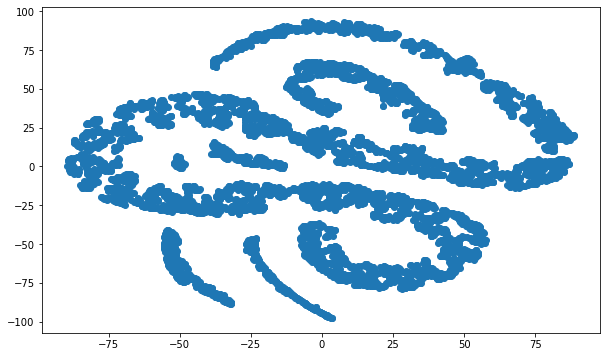

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df["Feature1"], tsne_df["Feature2"])
plt.savefig('plot.png')
plt.show()

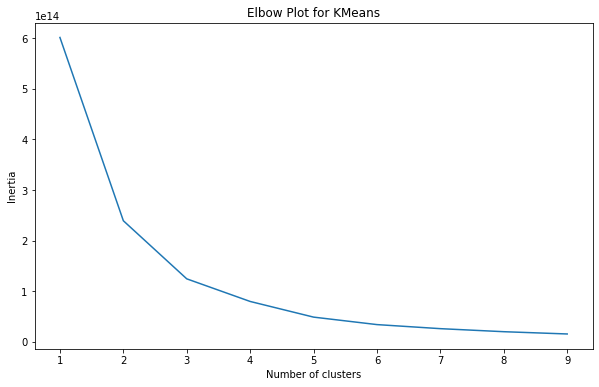

In [24]:
inertia = []
k = list(range(1, 10))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df_con)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow)

plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Elbow Plot for KMeans")
plt.show()